In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = '/content/drive/MyDrive/Colab Notebooks/traffic forecasting/Project1/traffic forecasting'

In [3]:
train = pd.read_csv(f'{PATH}/data/train.csv')
val = pd.read_csv(f'{PATH}/data/validate.csv')
test = pd.read_csv(f'{PATH}/data/test.csv')

In [43]:
train

Output hidden; open in https://colab.research.google.com to view.

In [25]:
pd.set_option('display.max_rows', None)

In [32]:
item_counts = train["날짜"].value_counts()
item_counts.sort_index()

20200101    24
20200102    24
20200103    24
20200104    24
20200105    24
20200106    24
20200107    24
20200108    24
20200109    24
20200110    24
20200111    24
20200112    24
20200113    24
20200114    24
20200115    24
20200116    24
20200117    24
20200118    24
20200119    24
20200120    24
20200121    24
20200122    24
20200123    24
20200124    24
20200125    24
20200126    24
20200127    24
20200128    24
20200129    24
20200130    24
20200131    24
20200201    24
20200202    24
20200203    24
20200204    24
20200205    24
20200206    24
20200207    24
20200208    24
20200209    24
20200210    24
20200211    24
20200212    24
20200213    24
20200214    24
20200215    24
20200216    24
20200217    24
20200218    24
20200219    24
20200220    24
20200221    24
20200222    24
20200223    24
20200224    24
20200225    24
20200226    24
20200227    24
20200228    24
20200229    13
20200301    24
20200302    24
20200303    24
20200304    24
20200305    24
20200306    24
20200307  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [41]:
val

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,2859,1549,12036,3225,7324,2789,5907,11097,2641,5396,20709,20787,8429,3184,2055,1430,27798,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,1940,1133,8316,2096,4423,1778,4028,7105,1773,3532,13160,13035,5459,1741,1230,859,16145,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,1425,1211,6623,2168,3693,1642,3376,5290,1268,3085,10377,10477,4610,1070,967,752,12335,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,1678,1748,7857,2593,4378,1637,4389,6325,1642,3983,11258,13014,5047,1289,1028,1129,14189,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,2531,2304,12197,4013,7034,3207,6514,13898,3185,8286,18038,27303,9132,2202,1599,1609,32976,679,2958,7369,4120,1569,4568,577,3155,1871,3656
5,20200511,5,190465,45176,3664,10542,2647,2090,85255,2508,5864,3572,25002,6849,13726,7718,12818,37011,9427,20524,33609,71418,23865,4804,3623,4103,117854,2109,8412,24748,14063,3022,9271,1462,7353,5356,9440
6,20200511,6,315762,84960,8479,19245,7560,4823,122710,4990,11463,5923,52017,11075,21494,15612,22135,61746,13542,33498,49100,106669,47572,9745,8491,8823,171413,6042,17389,39153,22809,4718,17617,3126,18852,11726,19625
7,20200511,7,360304,117986,12855,26433,13405,8024,133835,7207,17131,8631,80066,14240,27723,22965,32052,76937,15300,40276,56853,117419,70534,13666,13879,12253,183936,12008,21205,45185,26537,5786,26946,5841,29080,17415,27199
8,20200511,8,333740,105006,12562,28483,12452,8264,130680,7178,15784,8187,75520,14946,24313,20029,34239,71571,15146,37964,55266,113261,67746,12840,15893,9709,172044,9551,19165,40800,23882,5268,26948,6220,25215,16462,24872
9,20200511,9,306262,94966,10334,27854,10409,6873,132439,6595,15896,7975,68034,15666,24727,19132,31852,67939,13182,35829,59520,106002,60080,13763,14022,9677,157449,7529,17153,35452,19903,6328,20833,3216,19459,13318,21953


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      336 non-null    int64
 1   시간      336 non-null    int64
 2   10      336 non-null    int64
 3   100     336 non-null    int64
 4   101     336 non-null    int64
 5   120     336 non-null    int64
 6   121     336 non-null    int64
 7   140     336 non-null    int64
 8   150     336 non-null    int64
 9   160     336 non-null    int64
 10  200     336 non-null    int64
 11  201     336 non-null    int64
 12  251     336 non-null    int64
 13  270     336 non-null    int64
 14  300     336 non-null    int64
 15  301     336 non-null    int64
 16  351     336 non-null    int64
 17  352     336 non-null    int64
 18  370     336 non-null    int64
 19  400     336 non-null    int64
 20  450     336 non-null    int64
 21  500     336 non-null    int64
 22  550     336 non-null    int64
 23  600     336 non

In [40]:
test

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,12596,3060,7383,2958,5829,11297,2890,5694,19553,18919,9907,2912,1884,1112,28189,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,1839,1502,7741,2132,4790,1743,4296,6781,1752,3651,12454,11849,6292,1750,1118,703,16683,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,1360,1233,6475,2098,3965,1345,3957,4762,1250,3199,9640,9392,4961,1104,1004,485,11934,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,1671,1800,7720,2133,4083,1501,3992,6202,1505,4459,10802,11664,6015,1132,1061,851,13458,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,2574,2384,12018,3502,6430,2882,5957,11987,3176,9054,16490,23479,10676,1945,1520,1420,31698,669,2914,6986,3911,1368,4380,513,2940,1758,3629
5,20200518,5,189831,45068,3649,10252,2623,2469,77150,2359,5506,3633,25185,6505,13082,6507,12388,34498,8705,20810,30208,60796,27017,4411,3342,3552,111320,2195,7794,23215,12978,2529,9466,1438,7504,5018,9440
6,20200518,6,308110,86340,7513,18873,7471,4807,116072,4687,10978,5738,50675,10213,21266,13575,21101,58310,12614,33294,46500,91130,55139,8094,8064,8036,164869,5983,17034,41122,21860,4238,17043,3140,17833,11220,19074
7,20200518,7,356152,115498,11879,26290,13048,8334,129505,6813,17518,7828,80124,13058,25935,20274,31229,74453,15277,42530,55335,103884,82200,11848,13128,12141,185275,11137,21257,46353,25547,5072,27482,5657,29441,17059,26739
8,20200518,8,322218,103941,11517,28584,12707,8270,123804,7030,16659,7998,73291,14183,23796,17808,32514,68887,14501,37885,53823,94588,79436,12590,15805,9176,174009,9216,19364,40983,22726,5001,25752,5946,25280,16172,24477
9,20200518,9,299974,95460,9339,26643,9513,6489,122764,6394,15886,8030,66417,13920,24942,16155,30731,65707,13518,36430,58286,89395,69556,13281,14108,9291,151062,7205,16761,36851,20398,5185,21778,3656,19824,12809,21841


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      336 non-null    int64
 1   시간      336 non-null    int64
 2   10      336 non-null    int64
 3   100     336 non-null    int64
 4   101     336 non-null    int64
 5   120     336 non-null    int64
 6   121     336 non-null    int64
 7   140     336 non-null    int64
 8   150     336 non-null    int64
 9   160     336 non-null    int64
 10  200     336 non-null    int64
 11  201     336 non-null    int64
 12  251     336 non-null    int64
 13  270     336 non-null    int64
 14  300     336 non-null    int64
 15  301     336 non-null    int64
 16  351     336 non-null    int64
 17  352     336 non-null    int64
 18  370     336 non-null    int64
 19  400     336 non-null    int64
 20  450     336 non-null    int64
 21  500     336 non-null    int64
 22  550     336 non-null    int64
 23  600     336 non

# Graph

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
x_list = [x for x in range(0, 3278, 100)]
x_labels = [train.loc[x]['날짜'] for x in range(0, 3278, 100)]

In [ ]:
train.columns

Index(['날짜', '시간', '10', '100', '101', '120', '121', '140', '150', '160',
       '200', '201', '251', '270', '300', '301', '351', '352', '370', '400',
       '450', '500', '550', '600', '650', '652', '1000', '1020', '1040',
       '1100', '1200', '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

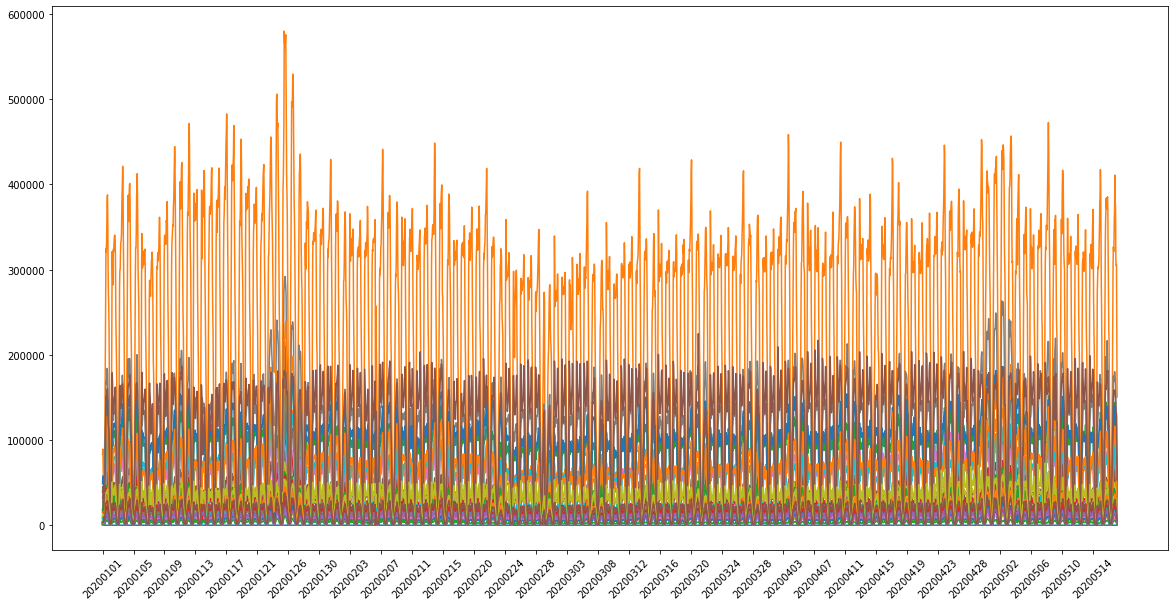

In [ ]:


for col in train.columns[1:]:
    plt.plot(train[col])
plt.xticks(x_list, labels=x_labels, rotation=45)


# plt.savefig('savefig_default.png')
plt.show()

설날과 어린이 날과 같은 휴일에 통행량이 증가하는 것을 볼수있다.  
일주일 마다 금요일에 통행량의 픽이있는 것으 볼수있다.  
데이터들이 하루마다의 주기성을 보이는 것을 알수있다.

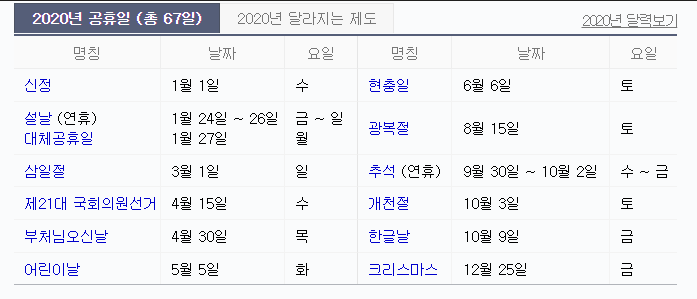

In [11]:
24*7

168

In [34]:
time

3192

In [39]:


for time in range(0, 3100,168):
    x_list = [x for x in range(time, time + 168, 12)]
    x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


    for col in train.columns[1:]:
        plt.plot(train[col])

    plt.xticks(x_list, labels=x_labels, rotation=45)
    plt.xlim([x_list[0], x_list[-1]])      # X축의 범위: [xmin, xmax]

    # plt.savefig('savefig_default.png')
    plt.show()

time = 3290-168
x_list = [x for x in range(time, time + 168, 12)]
x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


for col in train.columns[1:]:
    plt.plot(train[col])

plt.xticks(x_list, labels=x_labels, rotation=45)
plt.xlim([x_list[0], x_list[-1]])      # X축의 범위: [xmin, xmax]

# plt.savefig('savefig_default.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

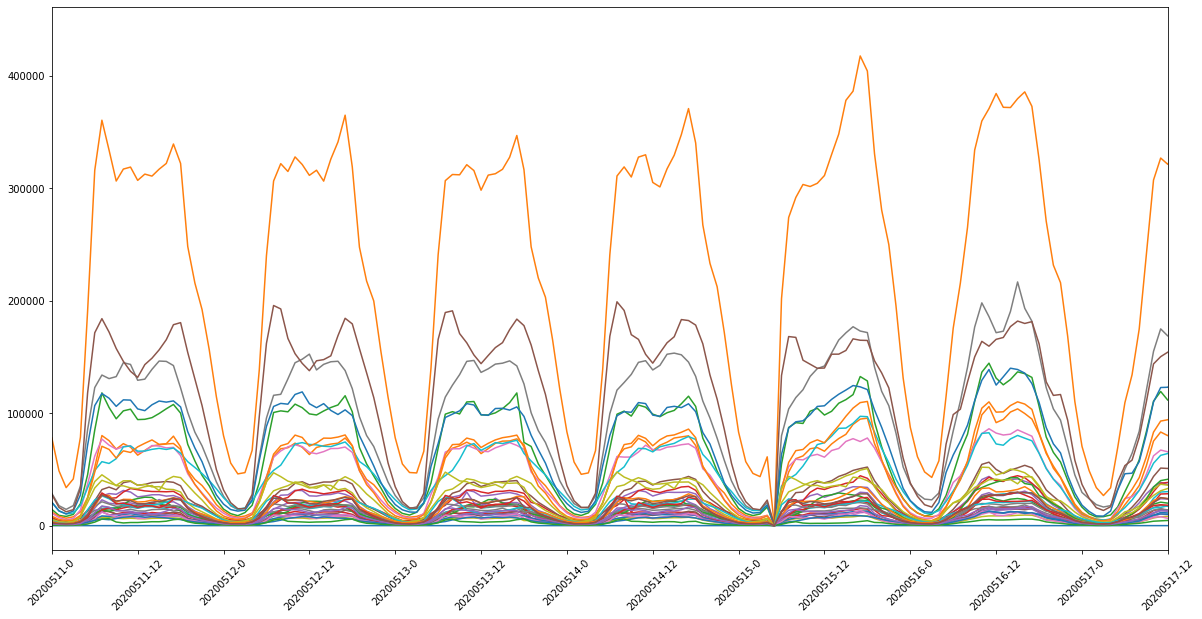

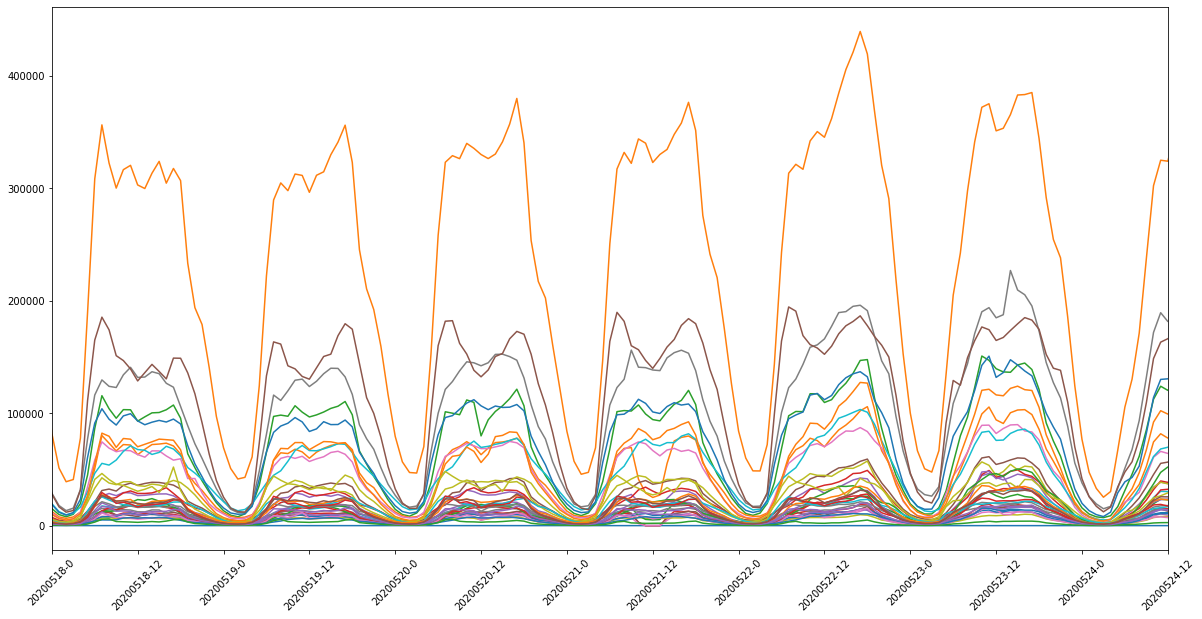

In [42]:
for time in range(0, 335,168):
    x_list = [x for x in range(time, time + 168, 12)]
    x_labels = [f'{val.loc[x]["날짜"]}-{val.loc[x]["시간"]}' for x in x_list]


    for col in val.columns[1:]:
        plt.plot(val[col])

    plt.xticks(x_list, labels=x_labels, rotation=45)
    plt.xlim([x_list[0], x_list[-1]])      # X축의 범위: [xmin, xmax]

    # plt.savefig('savefig_default.png')
    plt.show()

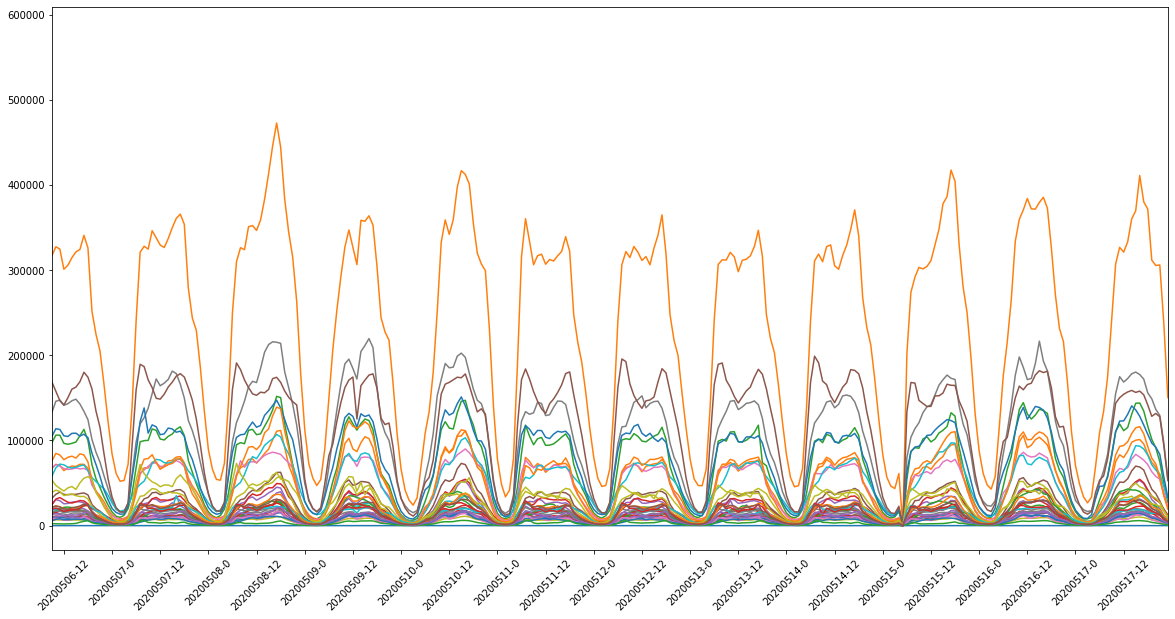

In [ ]:
x_list = [x for x in range(2991, 3278, 12)]
x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


for col in train.columns[1:]:
    plt.plot(train[col])

plt.xticks(x_list, labels=x_labels, rotation=45)
plt.xlim([3000, 3278])      # X축의 범위: [xmin, xmax]

# plt.savefig('savefig_default.png')
plt.show()

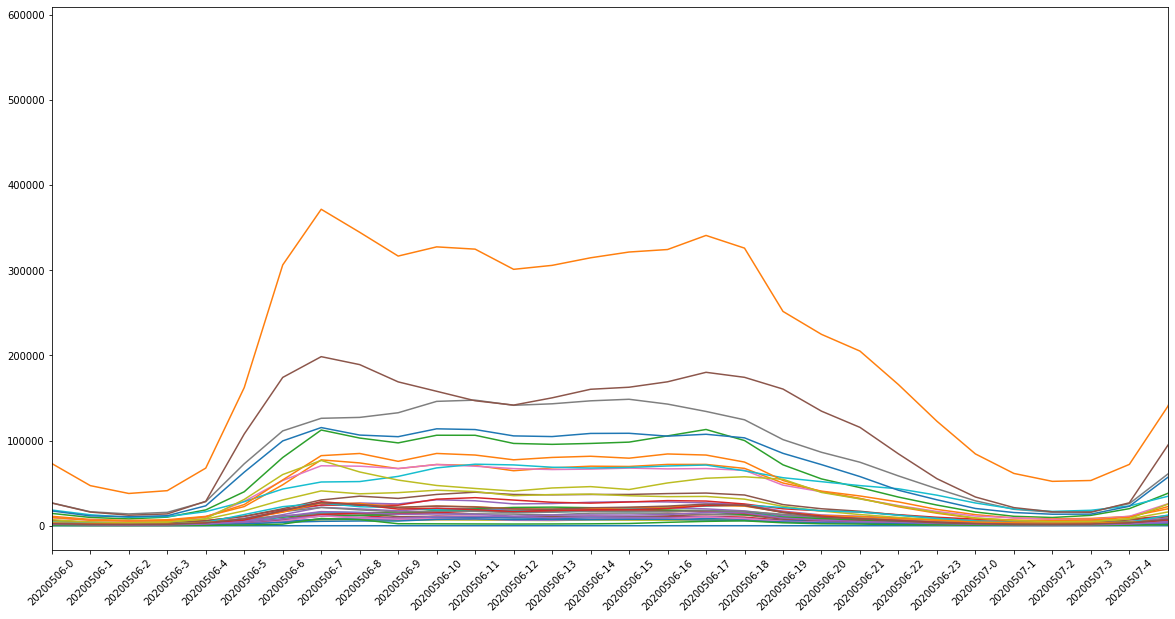

In [ ]:
x_list = [x for x in range(2991, 3020, 1)]
x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


for col in train.columns[1:]:
    plt.plot(train[col])

plt.xticks(x_list, labels=x_labels, rotation=45)
plt.xlim([2991, 3020])      # X축의 범위: [xmin, xmax]

# plt.savefig('savefig_default.png')
plt.show()

추가적으로 데이터 내의 주기성을 알아보자

In [ ]:
fft_list = []
for col in train.columns[1:]:
    fft_list.append(abs(np.fft.fft(train[col])))



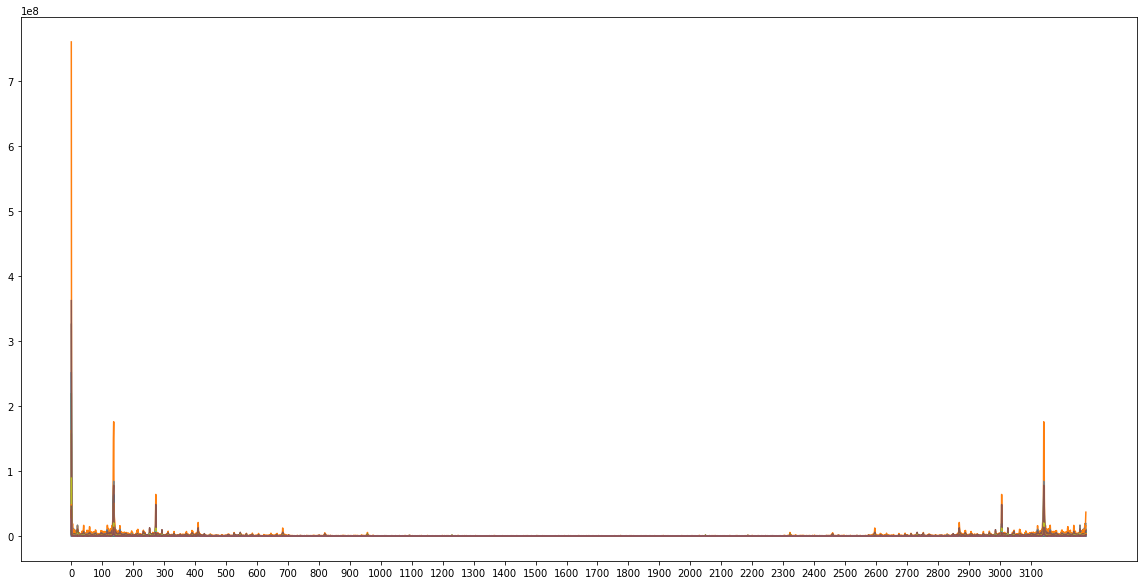

In [ ]:
for fft in fft_list:
    plt.plot(fft)
plt.xticks(range(0,3200,100))
plt.show()

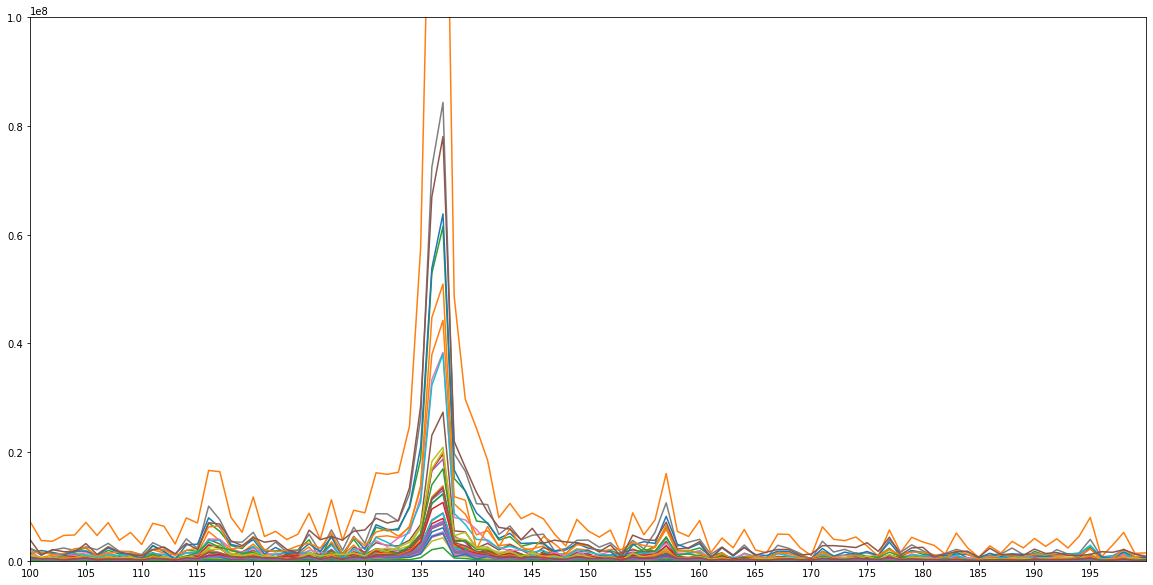

In [ ]:
for fft in fft_list:
    plt.plot(fft)
plt.xlim([100, 200])   
plt.ylim([0, 1e8])   
plt.xticks(range(100,200,5))
plt.show()

5.7일(137시간) 마다의 주기성이 있다.  
이는 주중의 통행량이 많고 주말에 적어서 생기는 주기성으로 보인다.

In [ ]:
137/24

5.708333333333333

In [ ]:
24*7

168

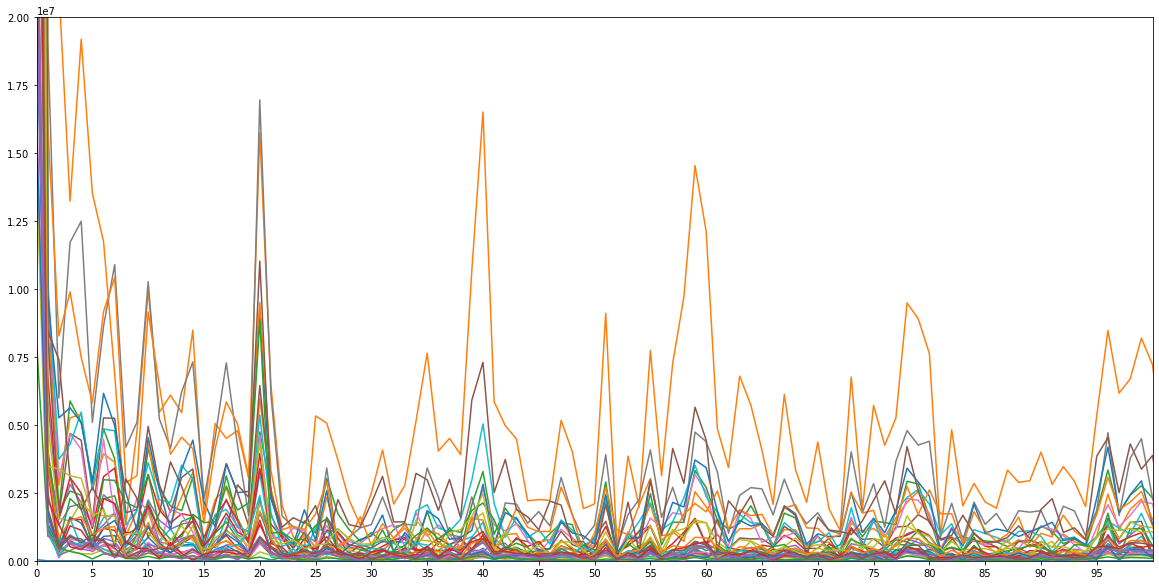

In [ ]:
for fft in fft_list:
    plt.plot(fft)
plt.xlim([0, 100])   
plt.ylim([0, 2e7])   
plt.xticks(range(0,100,5))
plt.show()

20시간 마다의 주기성이 있는 것으로 보이고, 이것은 5시부터 23시 까지 통행량이 많고 새벽에 적어서 생기는 것으로 보인다.

In [ ]:
20/24

0.8333333333333334

public 데이터 분포 확인

In [ ]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 8450

In [ ]:
for col in sample.columns[1:]:   # public score 32409
    sample.loc[:42, col] = 0
sample.to_csv('prediction.csv', index=False) 

In [ ]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 29267
for col in sample.columns[1:]:
    sample.loc[42:84, col] = 0
sample.to_csv('prediction.csv', index=False)

In [ ]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 31789
for col in sample.columns[1:]:
    sample.loc[84:126, col] = 0
sample.to_csv('prediction.csv', index=False)

In [ ]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 37766
for col in sample.columns[1:]:
    sample.loc[126:168, col] = 0
sample.to_csv('prediction.csv', index=False)

기간 별로 제출 데이터를 변경해본 결과 public score의 분포가 균일한 것으로 보이고, 이번에는 public score기준으로 준비해도 될것으로 보인다.